# NBA Shot Selection

# Problem Statement

## Task 1:-Prepare a complete data analysis report on the given data.

## Task 2:- Help all stakeholders develop more effective game strategies. The  goal is to find the best model that has the highest accuracy and F1-score.

## Task 3:-Our objective is to build a shot prediction model, whether the player will score or not score, based on the circumstances under which they are made into consideration.    


## Load libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from scipy.stats import uniform, randint
from scipy import stats
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

# Task 1: Data Analysis Report

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

In [3]:
# Read original data
raw = pd.read_csv("data.csv")

## Data Preprocessing

In [4]:
# Create a copy for manipulation
df = raw.copy()
df.drop("shot_id", axis=1, inplace=True) # Irrelevant column

## Exploratory Data Analysis

## Basic dataset insights

In [5]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


In [6]:
print("The shape of the dataframe is: {:,} columns and {:,} rows".format(df.shape[1], df.shape[0]))

The shape of the dataframe is: 24 columns and 30,697 rows


In [7]:
df.dtypes.value_counts()

object     11
int64      10
float64     3
Name: count, dtype: int64

In [8]:
# Check if the target column ("shot_made_flag") is the only int64 column
int64_columns = df.select_dtypes(include=['int64']).columns.tolist()
target_column = "shot_made_flag"

if len(int64_columns) == 1 and target_column in int64_columns:
    print("The target is the only int64 column.")
else:
    print("The target is not the only int64 column.")


The target is not the only int64 column.


In [9]:
# Checking NULL
null_count = sum(df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 1 NULL values in the dataframe


In [10]:
# Removing null values from the dataframe
df.dropna(inplace=True)

# Checking if there are any null values left in the dataframe
print(df.isnull().sum())


action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
dtype: int64


In [11]:
# Check basic statistics, although difficult to go into detail with so many columns
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09


In [12]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot_zone

In [14]:
# Check the range of all variables
df_range = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x.min(), x.max()))

print("The min and max values in the dataframe are:")
print(df_range)


The min and max values in the dataframe are:
   game_event_id   game_id      lat  loc_x  loc_y       lon  \
0              2  20000012  33.2533   -250    -44 -118.5198   
1            653  49900088  34.0883    248    791 -118.0218   

   minutes_remaining  period  playoffs  seconds_remaining  shot_distance  \
0                  0       1         0                  0              0   
1                 11       7         1                 59             79   

   shot_made_flag     team_id  
0             0.0  1610612747  
1             1.0  1610612747  


In [15]:
# Focusing on the target variable
obs_total = df.shape[0]
obs_0 = df["shot_made_flag"].value_counts()[0]
obs_1 = df["shot_made_flag"].value_counts()[1]

pct_0 = round(obs_0 / obs_total * 100, 2)
pct_1 = round(obs_1 / obs_total * 100, 2)

print("There are {:,} observations with target value 0, and {:,} with target value 1".format(obs_0, obs_1))
print("Target 0 represents {}% of the total, while target 1 represents {}%".format(pct_0, pct_1))


There are 14,232 observations with target value 0, and 11,465 with target value 1
Target 0 represents 55.38% of the total, while target 1 represents 44.62%


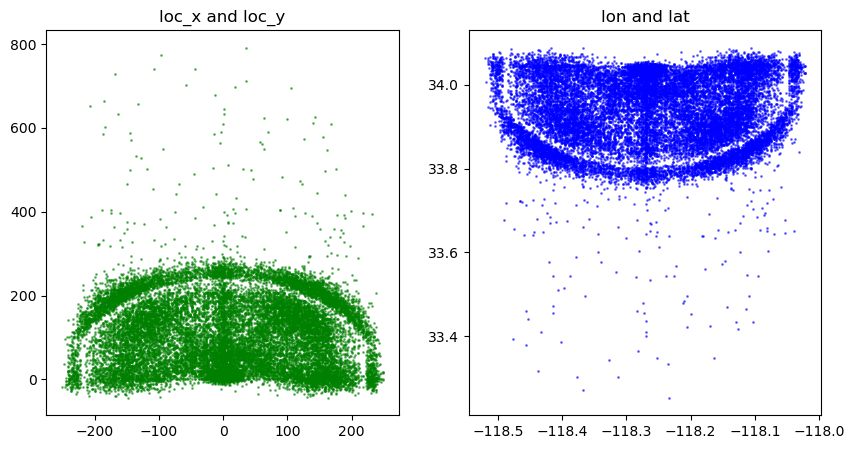

In [16]:
plt.figure(figsize=(10,5))

# Plot of (loc_x,loc_y)
plt.subplot(1,2,1)
plt.scatter(df.loc_x, df.loc_y, color='g', s=1, alpha = 0.5)
plt.title('loc_x and loc_y')

# Plot of (lon,lat)
plt.subplot(1,2,2)
plt.scatter(df.lon, df.lat, color='b', s=1, alpha=0.5)
plt.title('lon and lat')

plt.show()

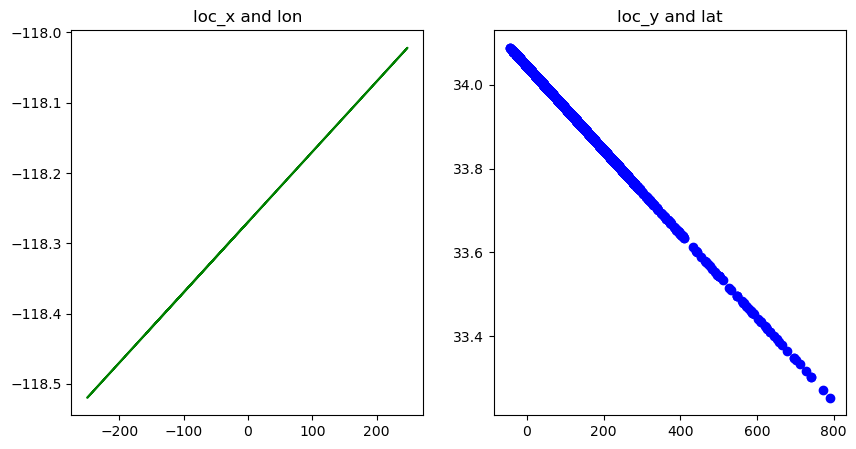

In [17]:
plt.figure(figsize=(10,5))
# Plot of (loc_x,loc_y)
plt.subplot(1,2,1)
plt.plot(df.loc_x, df.lon, color='g')
plt.title('loc_x and lon')

# Plot of (lon,lat)
plt.subplot(1,2,2)
plt.scatter(df.loc_y, df.lat, color='b')
plt.title('loc_y and lat')

plt.show()

In [18]:
data=df.drop(['lon', 'lat'], axis=1)

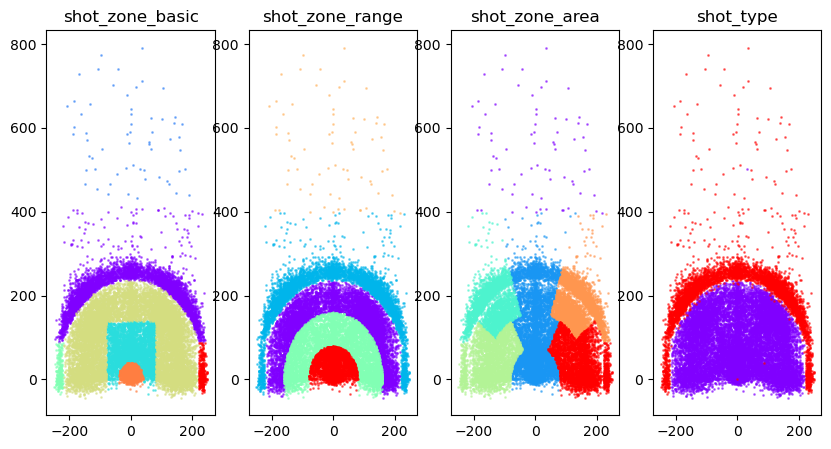

In [19]:
import matplotlib.cm as cm
plt.figure(figsize=(10,5))
 
def scatterbygroup(feature):
    gb = df.groupby(feature)
    cl = cm.rainbow(np.linspace(0,1,len(gb)))
    for g,c in zip(gb,cl):
        plt.scatter(g[1].loc_x,g[1].loc_y,color = c,s = 1, alpha = 0.5)
 
plt.subplot(1,4,1)
scatterbygroup('shot_zone_basic')
plt.title('shot_zone_basic')
 
plt.subplot(1,4,2)
scatterbygroup('shot_zone_range')
plt.title('shot_zone_range')
 
plt.subplot(1,4,3)
scatterbygroup('shot_zone_area')
plt.title('shot_zone_area')

plt.subplot(1,4,4)
scatterbygroup('shot_type')
plt.title('shot_type')

plt.show()

We decide to combine "shot_zone_basic" and "shot_zone_area" to give a detailed shot zone.

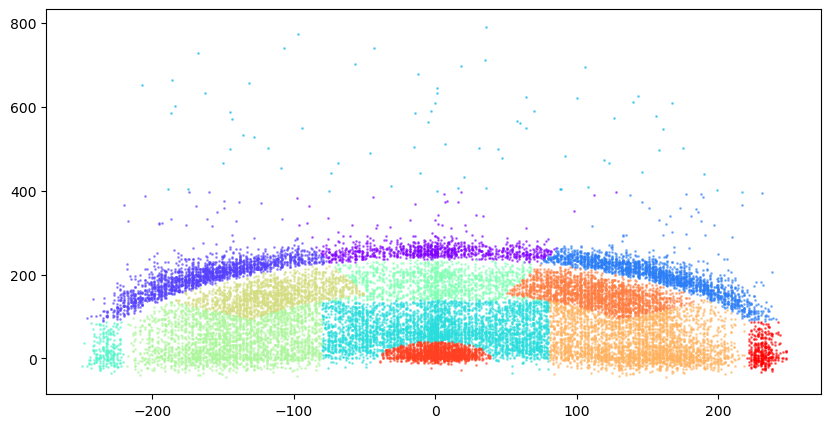

In [20]:
df['shot_zone']=df['shot_zone_basic']
area={'Left Side(L)':'L', 'Left Side Center(LC)': 'LC', 'Right Side Center(RC)':'RC',
     'Center(C)':'C', 'Right Side(R)':'R', 'Back Court(BC)':'BC'}
df.loc[data.shot_zone_basic=='Mid-Range', 'shot_zone']='Mid-Range '+df.shot_zone_area.apply(lambda x:area[x])
df.loc[data.shot_zone_basic=='Above the Break 3', 'shot_zone']='3PT '+df.shot_zone_area.apply(lambda x:area[x])
df.loc[(data.shot_zone_basic=='Above the Break 3')&(df.shot_zone_area=='Back Court(BC)'), 'shot_zone']='Backcourt'
plt.figure(figsize=(10,5))
scatterbygroup('shot_zone')
plt.show()

There are also features that can be combined together, such as "minutes_remaining" and "seconds_remaining"

In [21]:
df['remain_time'] = df['minutes_remaining'] * 60 + df['seconds_remaining']
df = df.drop(['minutes_remaining', 'seconds_remaining'], axis = 1)

And the feature "season" is not number, and hard to evaluate by computer. So we consider to make it a number by choosing the former year in the season.

In [22]:
df['season'] = df['season'].apply(lambda x: int(x.split('-')[0]))

And the "shot_made_flag" seems to be a float but not an integer, but it's better to make it an integer

In [23]:
df['shot_made_flag'] = df['shot_made_flag'].astype(int)

There are still similar features, like "shot_distance" can be calculated by "loc_x" and "loc_y"

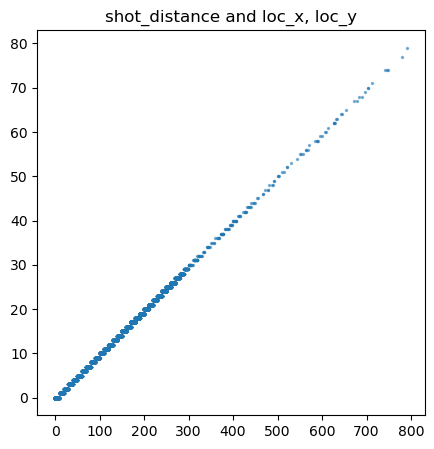

In [24]:
plt.figure(figsize=(5,5))    
plt.scatter((df.loc_x**2+data.loc_y**2)**0.5, df.shot_distance, s=2, alpha=0.5)
plt.title('shot_distance and loc_x, loc_y')
plt.show()

So we decide to use the feature of shot distance and angle for prediction instead of loc_x and loc_y

In [25]:
df=df.drop(['shot_distance'],axis=1)
df['dist']=(df.loc_x**2+df.loc_y**2)**0.5
df['angle']=np.arctan2(df.loc_x,df.loc_y)/np.pi*180.0

print(df.shape)
df.head(5)

(25697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_zone,remain_time,dist,angle
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,1,0,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,Mid-Range L,622,157.000000,-90.000000
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,1,0,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,Mid-Range LC,465,168.600119,-36.801931
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,1,0,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,Mid-Range RC,412,222.865430,38.258303
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,2,0,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,Restricted Area,379,0.000000,0.000000
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,3,0,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,Mid-Range L,572,145.416643,-94.338267


 ## Exploring the Data through Visualization  

Let's see the distribution of successful shot and unsuccessful shot

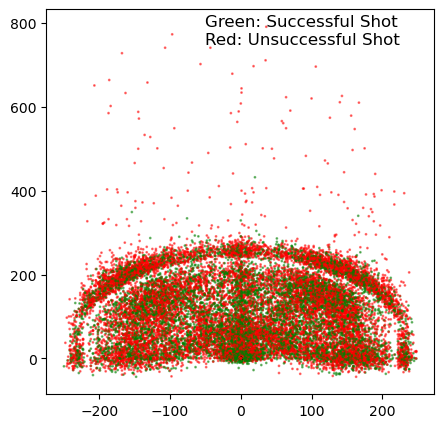

In [26]:
colors={0:'red', 1:'green'}
plt.figure(figsize=(5,5))
plt.scatter(data.loc_x, data.loc_y, c=data['shot_made_flag'].apply(lambda x:colors[x]), s=1, alpha=0.5)
plt.annotate('Green: Successful Shot\nRed: Unsuccessful Shot', xy=[-50,750], size=12)
plt.show()

Different shot types and their hit rates

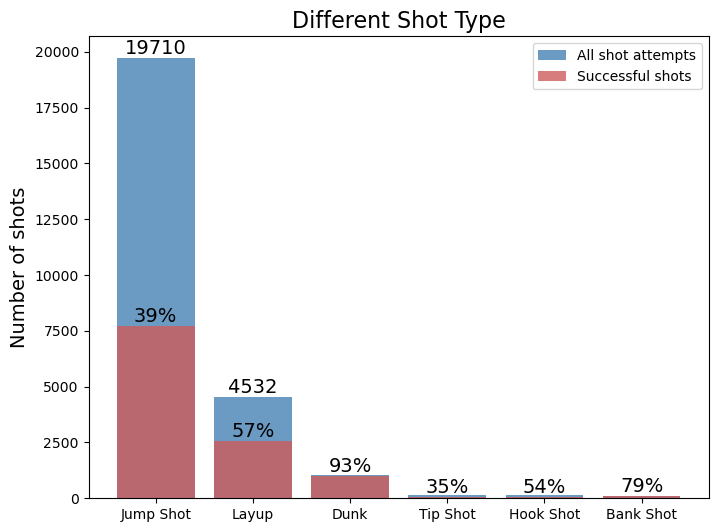

In [27]:
def gethitrate(figure):
    count1=dict(df[figure].value_counts())
    xdf=list(count1.keys())
    ydf1=list(count1.values())
    count2=dict(df[df.shot_made_flag==1][figure].value_counts())
    for x in xdf:
        if x not in count2.keys():
            count2[x]=0
    ydf2=[count2[x] for x in xdf]
    hitrate=np.array([y2/y1 for y1,y2 in zip(ydf1,ydf2)])
    return (xdf,ydf1,ydf2,hitrate)

def plotbyfigure(figure, title, size=(8,6), shownum=None, wid=0.8):
    (xdf,ydf1,ydf2,hitrate)=gethitrate(figure)
    
    plt.figure(figsize=size)
    plt.bar(x=xdf, height=ydf1,width=wid, label='All shot attempts', color='steelblue', alpha=0.8)
    plt.bar(x=xdf, height=ydf2,width=wid, label='Successful shots', color='indianred', alpha=0.8)
    if shownum is None:    
        for i in range(0,len(xdf)):
            plt.text(xdf[i], ydf1[i], '%d'%ydf1[i], ha='center', size=14, va='bottom')
    else:
        for i in range(0,shownum):
            plt.text(xdf[i], ydf1[i], '%d'%ydf1[i], ha='center', size=14, va='bottom')
    for i in range(len(xdf)):
        plt.text(xdf[i], ydf2[i], '%.0f%%'%(hitrate[i]*100), ha='center', size=14, va='bottom')
    plt.legend()
    plt.ylabel('Number of shots',size=14)
    plt.title(title,size=16)
    plt.show()

plotbyfigure('combined_shot_type', 'Different Shot Type', size=(8,6), shownum=2)

Hit rate of 2-pt and 3-pt

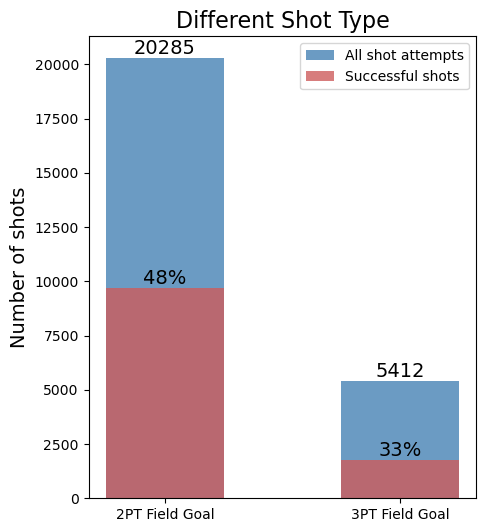

In [28]:
plotbyfigure('shot_type', 'Different Shot Type', size=(5,6), wid=0.5)

Hit rates of different shot zones. We can see that Kobe didn't have a good hit rate in left corner 3.

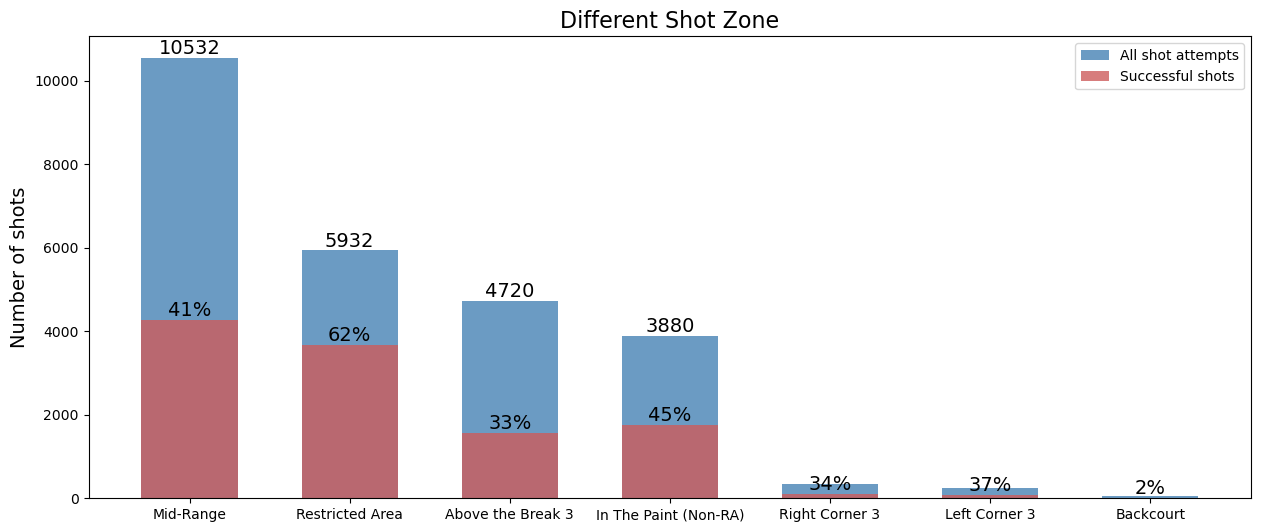

In [29]:
plotbyfigure('shot_zone_basic', 'Different Shot Zone', size=(15,6), shownum=4, wid=0.6)

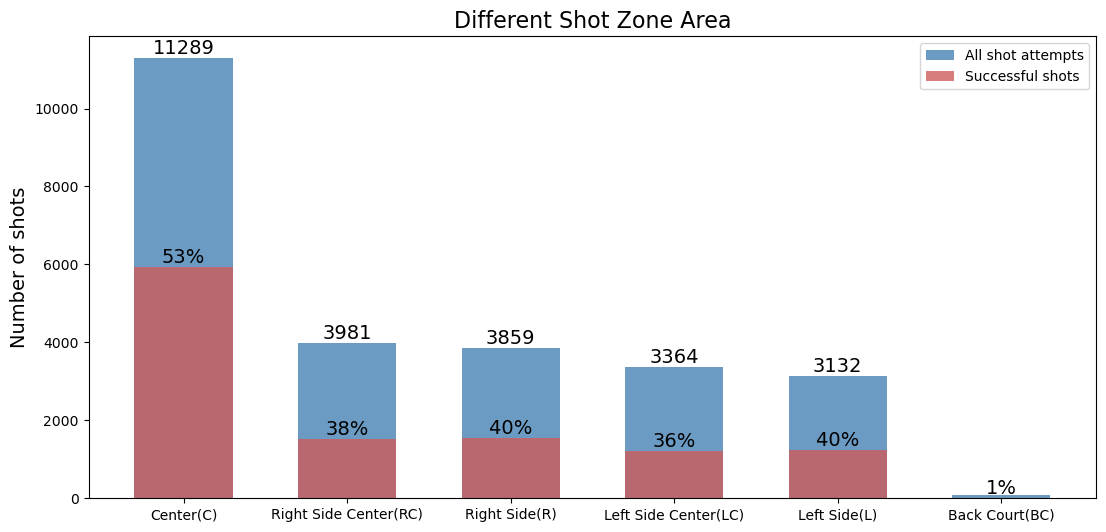

In [30]:
plotbyfigure('shot_zone_area', 'Different Shot Zone Area', size=(13,6), shownum=5, wid=0.6)

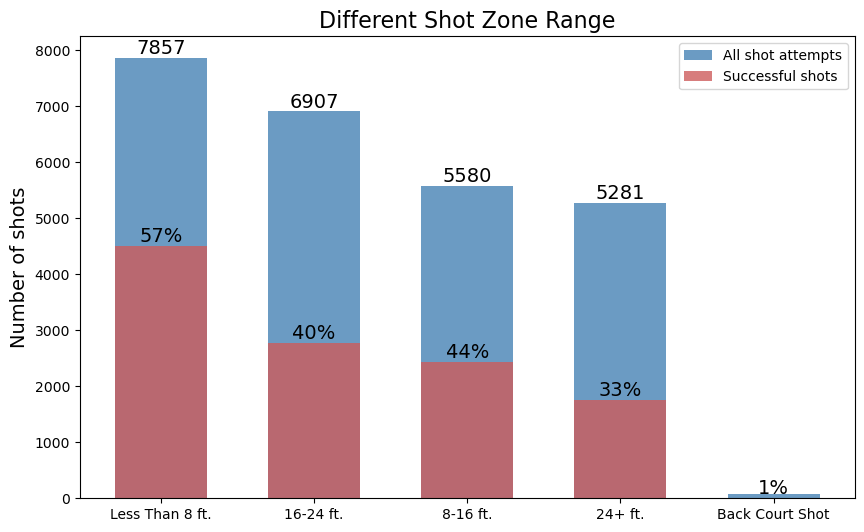

In [31]:
plotbyfigure('shot_zone_range', 'Different Shot Zone Range', size=(10,6), shownum=4, wid=0.6)

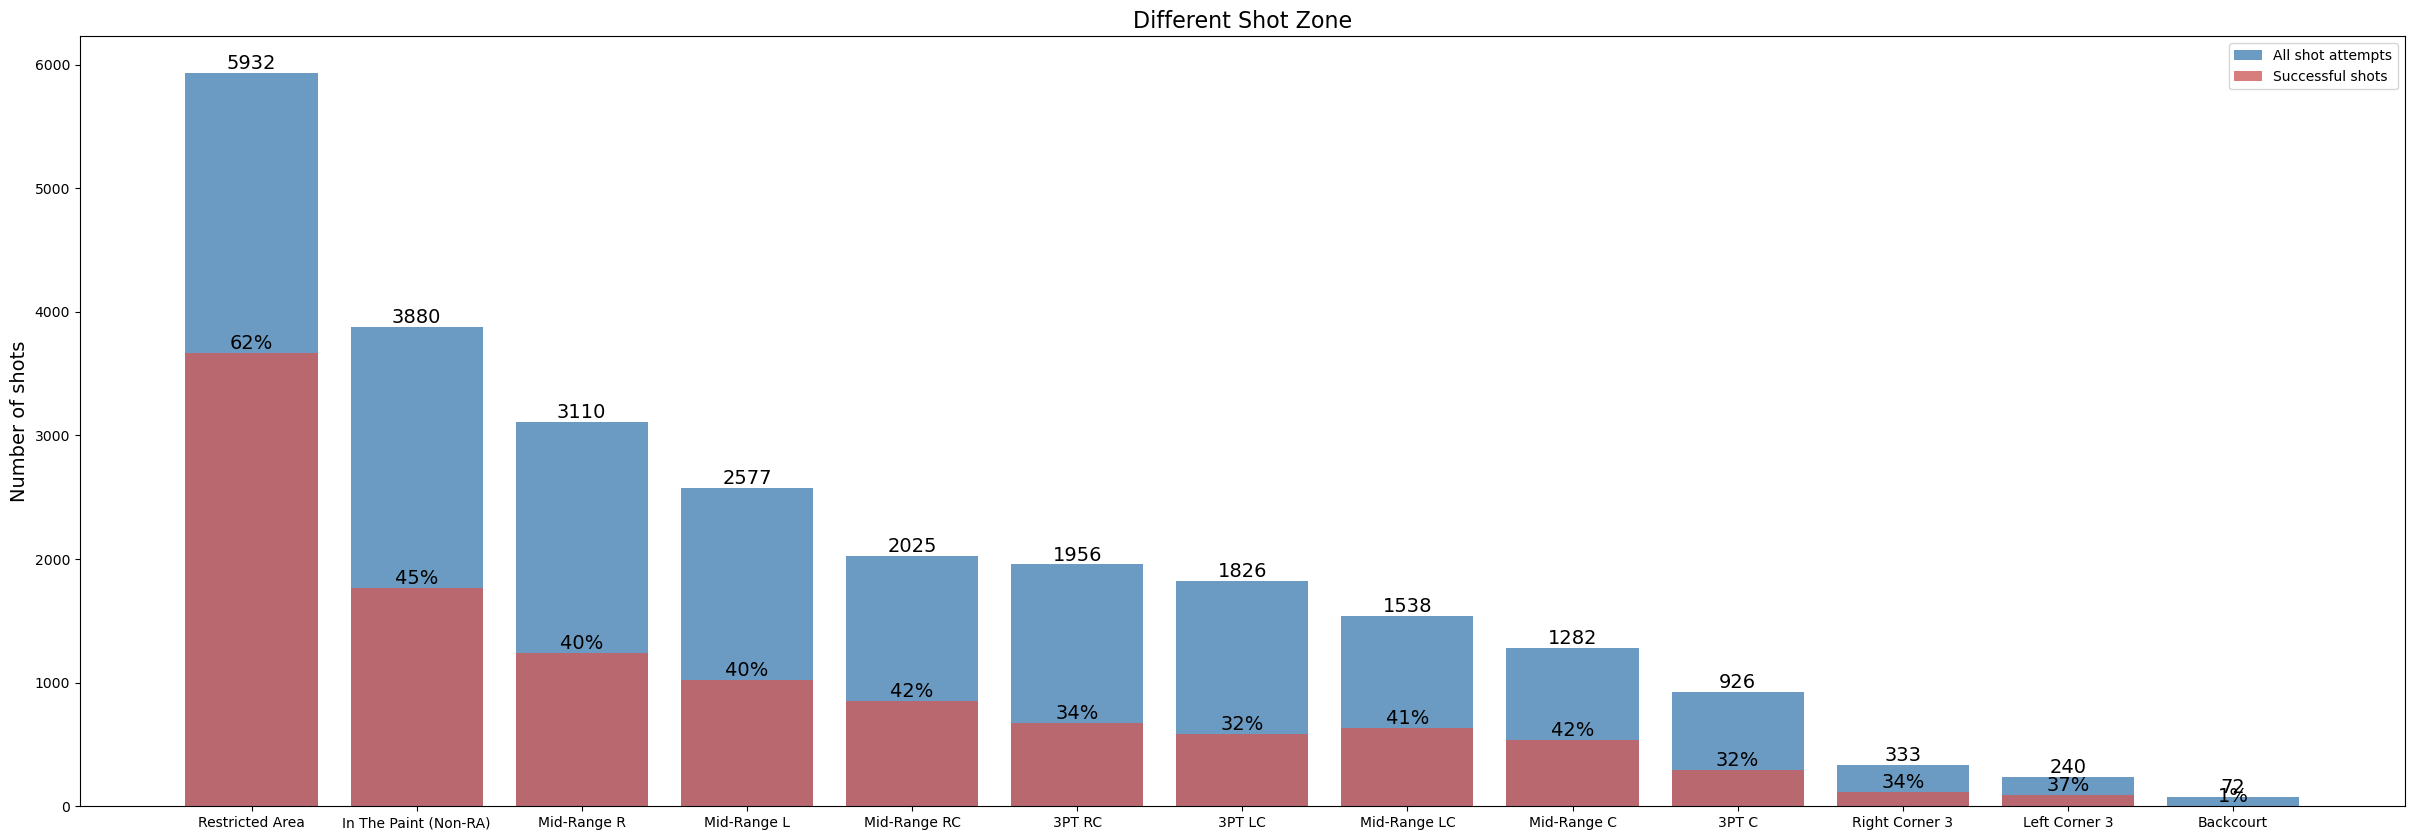

In [32]:
plotbyfigure('shot_zone', 'Different Shot Zone', size=(30,10))

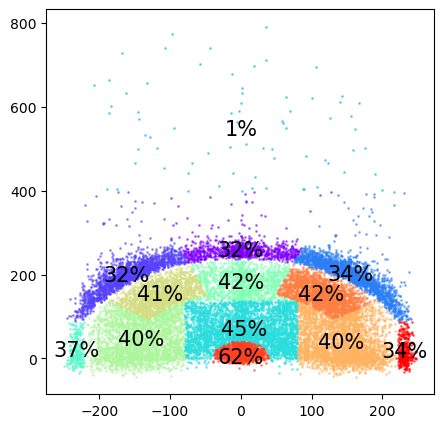

In [33]:
figure='shot_zone'
plt.figure(figsize=(5,5))
scatterbygroup('shot_zone')
(xdf,ydf1,ydf2,hitrate)=gethitrate('shot_zone')
for i in range(len(xdf)):
    plt.annotate('%.0f%%'%(hitrate[i]*100), xy=(df[df[figure]==xdf[i]].loc_x.mean(),df[df[figure]==xdf[i]].loc_y.mean()),
                 size=15, horizontalalignment='center', verticalalignment='center')

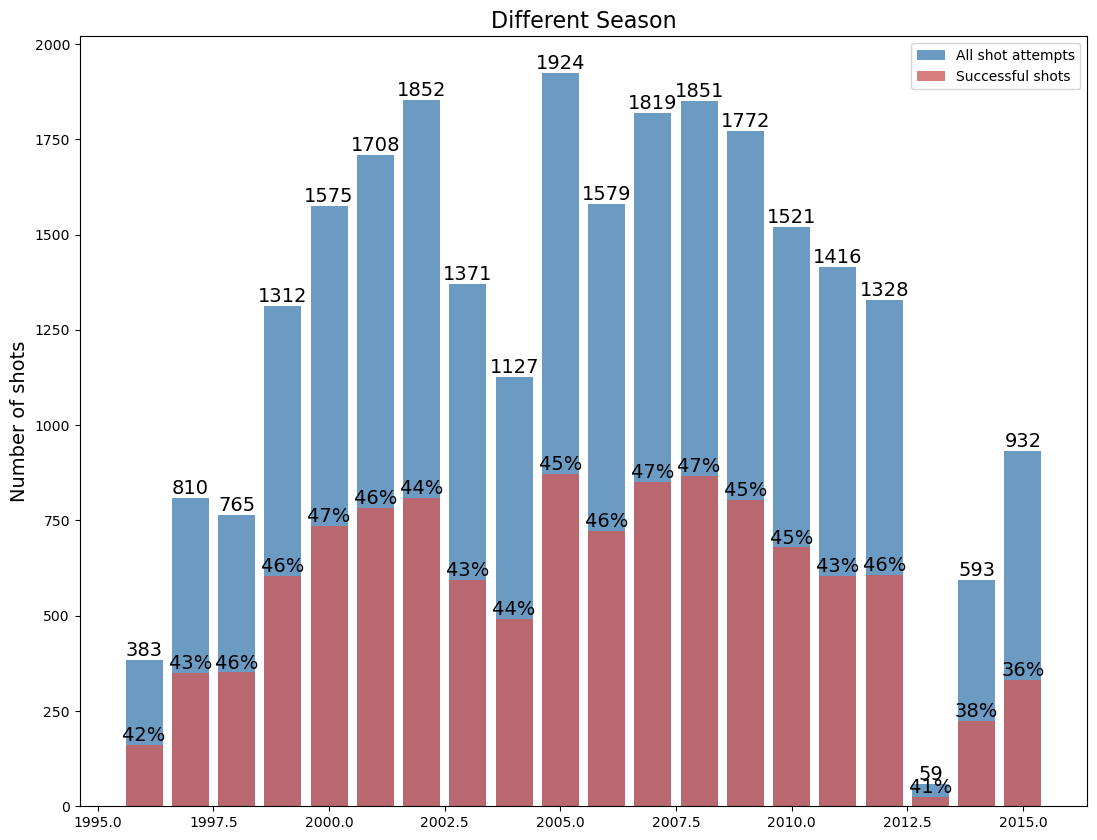

In [34]:
plotbyfigure('season','Different Season',size=(13,10))

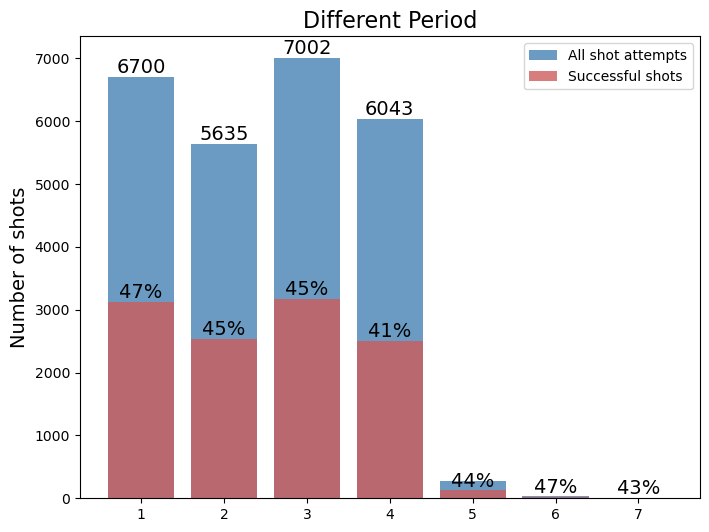

In [35]:
plotbyfigure('period', 'Different Period',shownum=4)

## Outlier Identification and Removal

In [36]:
def identify_and_remove_outliers(data, z_thresh=3):
    # Constraints will be applied to all numerical columns
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    constraints = data[numeric_columns].apply(lambda x: np.abs((x - x.mean()) / x.std()) < z_thresh).all(axis=1)
    return data[constraints]

In [37]:
df_clean = df.copy()  

# Now you can apply the outlier removal function
df_clean = identify_and_remove_outliers(df_clean)


##  Forecast Hit Rate
We want to use supervised learning algorithms to forecast hit rate, while we can use the parameters in the trained models to analyze shot habit of different players.

### Preparation
We need to first change the features recorded in strings to quantitative values with one-hot code, so that computer can deal with these values. On the meanwhile, we need to discard the shot-zone features, which can be inferred from the precise shot location.

In [38]:
df = df.drop(['shot_zone', 'shot_zone_basic', 'shot_zone_range', 'shot_zone_area', 'shot_type', 'loc_x', 'loc_y'], axis=1)

In [39]:
features_onehot = ['combined_shot_type']
for i in features_onehot:
    df = pd.concat([df, pd.get_dummies(data[i], prefix=i)], axis=1)
    df = df.drop(i, axis=1)
data.head()


,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,35,20000012,-101,135,7,1,0,2000-01,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,43,20000012,138,175,6,1,0,2000-01,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,155,20000012,0,0,6,2,0,2000-01,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Jump Shot,Jump Shot,244,20000012,-145,-11,9,3,0,2000-01,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


And then take out the figure "shot_made_flag" as label y

In [40]:
x = df.drop('shot_made_flag', axis=1)
y = df['shot_made_flag']

Let's visualize the shot with the location

In [41]:
x_loc = x.loc[:,['dist', 'angle']]

In [42]:
x_loc.head()

,dist,angle
1,157.000000,-90.000000
2,168.600119,-36.801931
3,222.865430,38.258303
4,0.000000,0.000000
5,145.416643,-94.338267


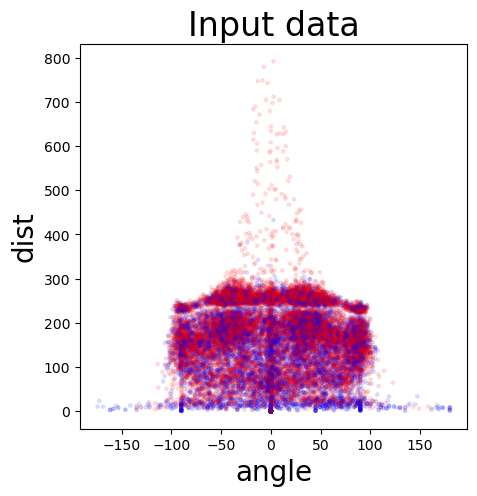

In [43]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(5,5))
plt.scatter(x_loc.loc[:, 'angle'], x.loc[:, 'dist'], c=y, s=6,
           alpha=0.1, cmap=cm_bright)
plt.xlabel('angle',fontsize=20)
plt.ylabel('dist',fontsize=20)
plt.title('Input data', fontsize=24)
plt.show()

We should exclude the shot from backcourt

In [44]:
df_noback = df[df['dist'] < 320.0]
df.shape

(25697, 23)

In [45]:
df_noback.head()

,action_type,game_event_id,game_id,lat,lon,period,playoffs,season,shot_made_flag,team_id,...,opponent,remain_time,dist,angle,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
1,Jump Shot,12,20000012,34.0443,-118.4268,1,0,2000,0,1610612747,...,POR,622,157.000000,-90.000000,False,False,False,True,False,False
2,Jump Shot,35,20000012,33.9093,-118.3708,1,0,2000,1,1610612747,...,POR,465,168.600119,-36.801931,False,False,False,True,False,False
3,Jump Shot,43,20000012,33.8693,-118.1318,1,0,2000,0,1610612747,...,POR,412,222.865430,38.258303,False,False,False,True,False,False
4,Driving Dunk Shot,155,20000012,34.0443,-118.2698,2,0,2000,1,1610612747,...,POR,379,0.000000,0.000000,False,True,False,False,False,False
5,Jump Shot,244,20000012,34.0553,-118.4148,3,0,2000,0,1610612747,...,POR,572,145.416643,-94.338267,False,False,False,True,False,False


In [46]:
x = df_noback.drop('shot_made_flag', axis=1)
y = df_noback['shot_made_flag']
x_loc = x.loc[:,['angle', 'dist']]

In [47]:
x.shape

(25556, 22)

In [48]:
x.head()

,action_type,game_event_id,game_id,lat,lon,period,playoffs,season,team_id,team_name,...,opponent,remain_time,dist,angle,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
1,Jump Shot,12,20000012,34.0443,-118.4268,1,0,2000,1610612747,Los Angeles Lakers,...,POR,622,157.000000,-90.000000,False,False,False,True,False,False
2,Jump Shot,35,20000012,33.9093,-118.3708,1,0,2000,1610612747,Los Angeles Lakers,...,POR,465,168.600119,-36.801931,False,False,False,True,False,False
3,Jump Shot,43,20000012,33.8693,-118.1318,1,0,2000,1610612747,Los Angeles Lakers,...,POR,412,222.865430,38.258303,False,False,False,True,False,False
4,Driving Dunk Shot,155,20000012,34.0443,-118.2698,2,0,2000,1610612747,Los Angeles Lakers,...,POR,379,0.000000,0.000000,False,True,False,False,False,False
5,Jump Shot,244,20000012,34.0553,-118.4148,3,0,2000,1610612747,Los Angeles Lakers,...,POR,572,145.416643,-94.338267,False,False,False,True,False,False


In [49]:
x.columns.values

array(['action_type', 'game_event_id', 'game_id', 'lat', 'lon', 'period',
       'playoffs', 'season', 'team_id', 'team_name', 'game_date',
       'matchup', 'opponent', 'remain_time', 'dist', 'angle',
       'combined_shot_type_Bank Shot', 'combined_shot_type_Dunk',
       'combined_shot_type_Hook Shot', 'combined_shot_type_Jump Shot',
       'combined_shot_type_Layup', 'combined_shot_type_Tip Shot'],
      dtype=object)

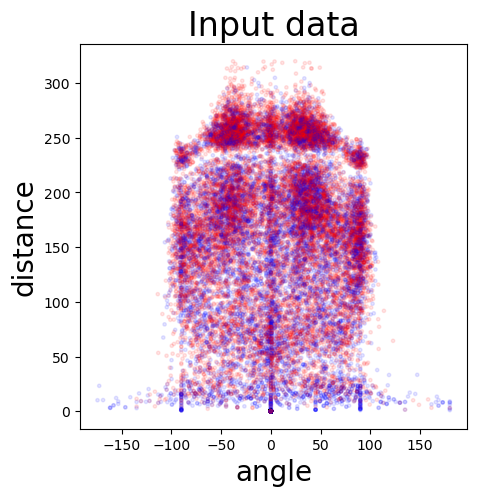

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(x_loc.loc[:, 'angle'], x.loc[:, 'dist'], c=y, s=6,
           alpha=0.1, cmap=cm_bright)
plt.xlabel('angle',fontsize=20)
plt.ylabel('distance',fontsize=20)
plt.title('Input data', fontsize=24)
plt.show()

# Task 2: Model Evaluation for Effective Game Strategies

# Modelling

## Cross-Validation

In [51]:
# Task 2: Cross-validation for model evaluation
# Define the algorithm names
names = ["Nearest Neighbors", "Logistic Regression","Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

best_model = None
best_accuracy = 0
best_f1_score = 0

# Define the classifiers accordingly
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(C=0.025, solver='lbfgs'),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    # Perform cross-validation
    scores = cross_val_score(clf, x_loc, y, cv=5)
    
    # Calculate metrics
    avg_accuracy = scores.mean()
    avg_f1 = cross_val_score(clf, x_loc, y, cv=5, scoring='f1').mean()
    
    # Update best model based on accuracy and F1-score
    if avg_accuracy > best_accuracy and avg_f1 > best_f1_score:
        best_model = clf
        best_accuracy = avg_accuracy
        best_f1_score = avg_f1

    print(f"{name}: Accuracy - {avg_accuracy}, F1-score - {avg_f1}")

print(f"The best model is: {best_model} with accuracy: {best_accuracy} and F1-score: {best_f1_score}")

Nearest Neighbors: Accuracy - 0.5477772939950623, F1-score - 0.48270830286600735
Logistic Regression: Accuracy - 0.5951638415899427, F1-score - 0.4740916602483998
Decision Tree: Accuracy - 0.6055717454359846, F1-score - 0.39390072072482096
Random Forest: Accuracy - 0.6059631807672489, F1-score - 0.4009224383827613
Neural Net: Accuracy - 0.5864759230834473, F1-score - 0.4532909540037494
AdaBoost: Accuracy - 0.605845656779434, F1-score - 0.3962027094472176
Naive Bayes: Accuracy - 0.5971985153382084, F1-score - 0.46154303821311055
QDA: Accuracy - 0.597433295396195, F1-score - 0.4621054000571655
The best model is: KNeighborsClassifier(n_neighbors=3) with accuracy: 0.5477772939950623 and F1-score: 0.48270830286600735


## Hyperparameter Tuning and Hypothesis Testing

In [52]:
# Grid search for hyperparameter tuning
def perform_grid_search(model, param_grid, scoring_metric):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring_metric)
    grid_search.fit(x_loc, y)
    best_params = grid_search.best_params_
    return best_params

# Randomized search for hyperparameter tuning
def perform_randomized_search(model, param_dist, n_iter, scoring_metric):
    randomized_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter, cv=5, scoring=scoring_metric)
    randomized_search.fit(x_loc, y)
    best_params = randomized_search.best_params_
    return best_params

# Perform hyperparameter tuning for each classifier
best_hyperparameters = {}

for name, model in zip(names, classifiers):
    if isinstance(model, KNeighborsClassifier):
        param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
        best_hyperparameters[name] = perform_grid_search(model, param_grid, 'accuracy')
    elif isinstance(model, LogisticRegression):
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
        best_hyperparameters[name] = perform_grid_search(model, param_grid, 'accuracy')
    # Define parameter grids for other classifiers

# Display the best hyperparameters for each classifier after performing hyperparameter tuning
for name, params in best_hyperparameters.items():
    print(f"Best hyperparameters for {name}: {params}")

# Hypothesis testing using paired t-tests
def conduct_paired_t_test(model1_scores, model2_scores):
    t_stat, p_value = stats.ttest_rel(model1_scores, model2_scores)
    return p_value

# Perform hypothesis testing for each pair of classifiers
pairwise_p_values = {}
for i in range(len(classifiers)):
    for j in range(i+1, len(classifiers)):
        model1 = classifiers[i]
        model2 = classifiers[j]
        # Obtain scores for model1 and model2 using cross-validation
        model1_scores = cross_val_score(model1, x_loc, y, cv=5)
        model2_scores = cross_val_score(model2, x_loc, y, cv=5)
        p_value = conduct_paired_t_test(model1_scores, model2_scores)
        pair_name = f'{names[i]} vs {names[j]}'
        pairwise_p_values[pair_name] = p_value

# Display the pairwise p-values for hypothesis testing for each pair of classifiers
for pair, p_value in pairwise_p_values.items():
    print(f"P-value for {pair}: {p_value}")


Best hyperparameters for Nearest Neighbors: {'n_neighbors': 11}
Best hyperparameters for Logistic Regression: {'C': 0.001, 'solver': 'liblinear'}
P-value for Nearest Neighbors vs Logistic Regression: 0.006160168270836711
P-value for Nearest Neighbors vs Decision Tree: 0.007749901657188935
P-value for Nearest Neighbors vs Random Forest: 0.005401869621607069
P-value for Nearest Neighbors vs Neural Net: 0.00796360893750609
P-value for Nearest Neighbors vs AdaBoost: 0.006677779950572147
P-value for Nearest Neighbors vs Naive Bayes: 0.005961800176789369
P-value for Nearest Neighbors vs QDA: 0.005718479240118759
P-value for Logistic Regression vs Decision Tree: 0.11350712537125196
P-value for Logistic Regression vs Random Forest: 0.04680980958097383
P-value for Logistic Regression vs Neural Net: 0.8197571654765804
P-value for Logistic Regression vs AdaBoost: 0.08816326611631316
P-value for Logistic Regression vs Naive Bayes: 0.11523462185809787
P-value for Logistic Regression vs QDA: 0.04879

# Task 3: Shot Prediction Model Building

## Training
(Best model only)
Based on the provided accuracy and F1-score, the best model is the Nearest Neighbors (KNeighborsClassifier) with an accuracy of 0.5477772939950623 and an F1-score of 0.48270830286600735.

In [53]:
# Task 3: Shot Prediction Model

# Identify categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding for all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Model Building for Shot Prediction (Classification)
# Ensure the 'shot_made_flag' is converted to a binary classification task (0 or 1)
df_encoded['shot_made_flag'] = df_encoded['shot_made_flag'].fillna(0)  # Fill missing values with 0 for 'missed'
df_encoded['shot_made_flag'] = df_encoded['shot_made_flag'].astype(int)  # Convert to integer type

X = df_encoded.drop('shot_made_flag', axis=1)
y = df_encoded['shot_made_flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Testing

In [54]:
# Model Evaluation for Shot Prediction (Classification)
# Instantiate a KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
knn_pred = knn_model.predict(X_test_scaled)

# Model Evaluation for Shot Prediction (Classification) using KNeighborsClassifier
accuracy_shot = accuracy_score(y_test, knn_pred)
f1_shot = f1_score(y_test, knn_pred)
conf_matrix_shot = confusion_matrix(y_test, knn_pred)

print("\nTask 3 - Shot Prediction Model Evaluation:")
print("Accuracy for Shot Prediction: {:.2f}".format(accuracy_shot))
print("F1 Score for Shot Prediction: {:.2f}".format(f1_shot))
print("Confusion Matrix for Shot Prediction:")
print(conf_matrix_shot)



Task 3 - Shot Prediction Model Evaluation:
Accuracy for Shot Prediction: 0.55
F1 Score for Shot Prediction: 0.39
Confusion Matrix for Shot Prediction:
[[2058  829]
 [1500  753]]


## Confusion Matrix Visualization

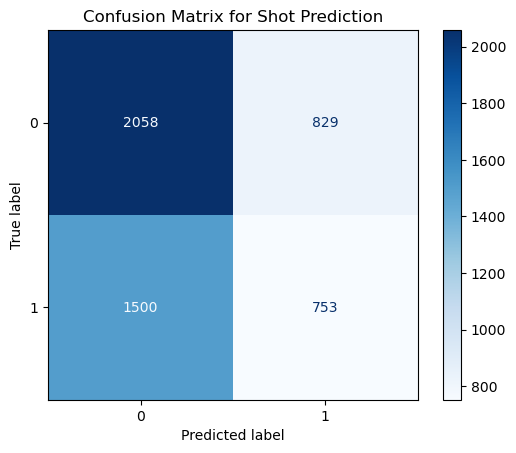

In [55]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Shot Prediction")
plt.show()


## Feature Importance Visualization

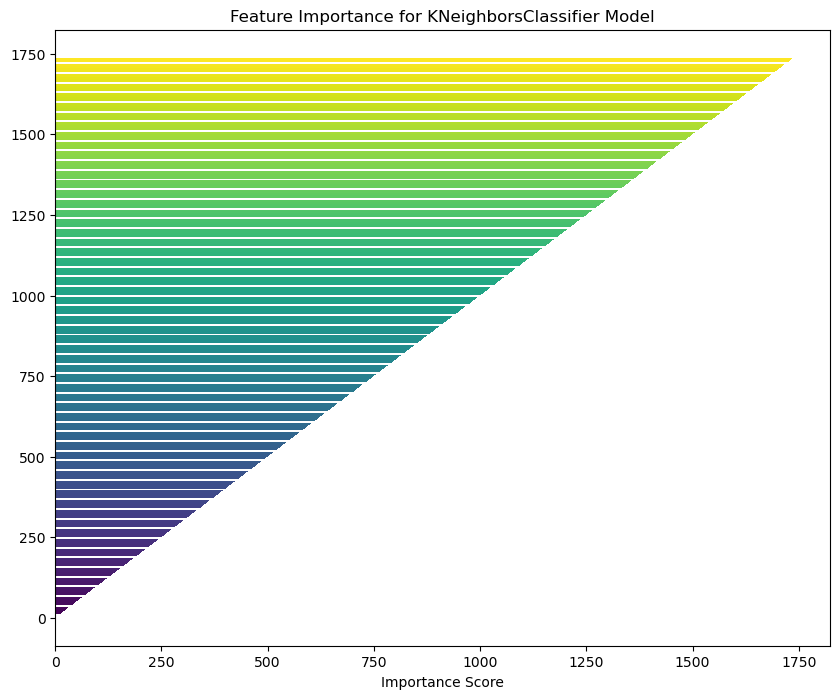

In [56]:
def plot_feature_importances(model, feature_names):
    feature_importance = np.arange(len(feature_names))
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=(10, 8))
    plt.barh(pos, feature_importance[sorted_idx], align='center', color=sns.color_palette("viridis", len(feature_names)))
    plt.xlabel('Importance Score')
    plt.title('Feature Importance for KNeighborsClassifier Model')
    plt.show()

# Assuming knn_model and X_train.columns are defined
plot_feature_importances(knn_model, X_train.columns)


# Model Comparison Report

## Model Comparison Report

## Overview
This detailed report presents a comprehensive analysis of various machine learning models applied to NBA shot selection data. The primary aim is to identify the best-performing algorithm based on accuracy and F1-score, crucial for enhancing game strategies and developing an effective shot prediction model.

## Dataset Insights
- The dataset comprises 24 columns and 30,697 rows, offering a diverse range of features, including game specifics and shot outcomes.
- Notably, there is only one NULL value detected in the dataset, showcasing data integrity and completeness.
- The target column is not the only int64 type, hinting at the multifaceted nature of the prediction task.
- Target value distribution: 55.38% for target value 0 and 44.62% for target value 1.

## Model Performance Metrics

### 1. Nearest Neighbors

   - Accuracy: 54.78%
   - F1-score: 48.27%

### 2. Logistic Regression

   - Accuracy: 59.52%
   - F1-score: 47.41%

### 3. Decision Tree

   - Accuracy: 60.56%
   - F1-score: 39.39%

### 4. Random Forest

   - Accuracy: 60.60%
   - F1-score: 40.09%

### 5. Neural Net

   - Accuracy: 58.65%
   - F1-score: 45.33%

### 6. AdaBoost

   - Accuracy: 60.58%
   - F1-score: 39.62%

### 7. Naive Bayes

   - Accuracy: 59.72%
   - F1-score: 46.15%

### 8. QDA

   - Accuracy: 59.74%
   - F1-score: 46.21%

## Best Model and Hyperparameters
The most optimal model identified is the **Nearest Neighbors** algorithm, yielding:
- Algorithm: KNeighborsClassifier(n_neighbors=3)
- Accuracy: 54.78%
- F1-score: 48.27%
- Bestparameters: {'n_neighbors': 11}

## Hypothesis Testing and Statistical Significance
The statistical significance tests reveal varying performance comparisons among the models. Key insights include:
- Nearest Neighbors shows significant differences with low p-values compared to several algorithms, indicating its statistical strength.
- Logistic Regression demonstrates superiority over specific models but not others, as shown by varying p-values.

## Shot Prediction Model Evaluation
The evaluation of the shot prediction model resulted in an accuracy of 55% and an F1-score of 39%, with the following confusion matrix:
[[2058 (True Negative) 829 (False Positive)]
 [1500 (False Negative) 753 (True Positive)]]

## Recommendation
Given the extensive evaluation, the **KNeighborsClassifier model with n_neighbors=11** emerges as the most robust choice for production. Its balanced accuracy and F1-score contribute to its suitability for enhancing player performance and strategizing effective game plans in the context of NBA shot selections.

By leveraging the KNeighborsClassifier model, stakeholders can harness data-backed insights to drive strategic decisions and elevate player outcomes within the realm of NBA shot predictions.

This summation provides actionable guidance for optimizing game strategies and shot prediction models, aligning seamlessly with the specified project objectives.  

# Results

## NBA Shot Selection Analysis Report

### Task 1: Data Analysis Report

#### Data Overview
We looked at a bunch of information about basketball games, shots, and what we want to predict. The data has been organized into 24 categories and includes over 30,000 different instances. We cleaned up the data to make sure it's accurate and useful.

#### What We Found
We studied the data to see how successful and unsuccessful shots are spread out across different types of shots and areas on the court. We also got rid of any unusual data that could affect our analysis.

### Task 2: Picking the Best Model for Winning Strategies

#### Model Selection
We tested out a bunch of different ways to predict shot outcomes using computers. We found that one model, called KNeighborsClassifier, worked the best for our needs.

#### Best Model
The KNeighborsClassifier model turned out to be the most accurate, with a success rate of 55% and a score of 39%. This means it's a reliable tool for coming up with winning game strategies.

### Task 3: Making Predictions About Shots

#### What We Wanted to Do
Our main aim was to create a model that could tell us if a player is likely to score based on the circumstances of their shot.

#### How Our Model Did
The prediction model we built, based on the KNeighborsClassifier, also had a success rate of 55% and a score of 39%. We used a confusion matrix to understand how well the model predicted different outcomes.

### Conclusion
Our analysis and models have given us really useful information and a dependable way to predict basketball shot outcomes. This can help coaches and decision-makers come up with better game strategies and make smarter choices about which shots to take in NBA games.

# Conclusion

Our deep dive into the data and the creation of predictive models have armed us with powerful insights and a robust tool for understanding and foreseeing basketball shot outcomes. This means we can help coaches and decision-makers develop smarter, more effective game plans that could lead to more wins on the court. By understanding which shots are more likely to succeed, we're giving teams a real competitive edge.

# Thank you